## Airbnb Stock price prediction

- The goal of this project is to predict Airbnb's stock closing prices using historical stock market data. By leveraging machine learning models, we aim to develop an effective forecasting system to assist investors and analysts in decision-making.
### 1. Data Loading and preprocessing
- import Required Libraries

In [29]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_theme(color_codes =True)

In [30]:
# load dataset
df = pd.read_csv(r"C:\Users\shuva\Downloads\archive (2)\ABNB.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


### Convert Date column to Date Time Format

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


### 2. EDA (exploratory data analysis
- visualizing stock price trends

(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10')])

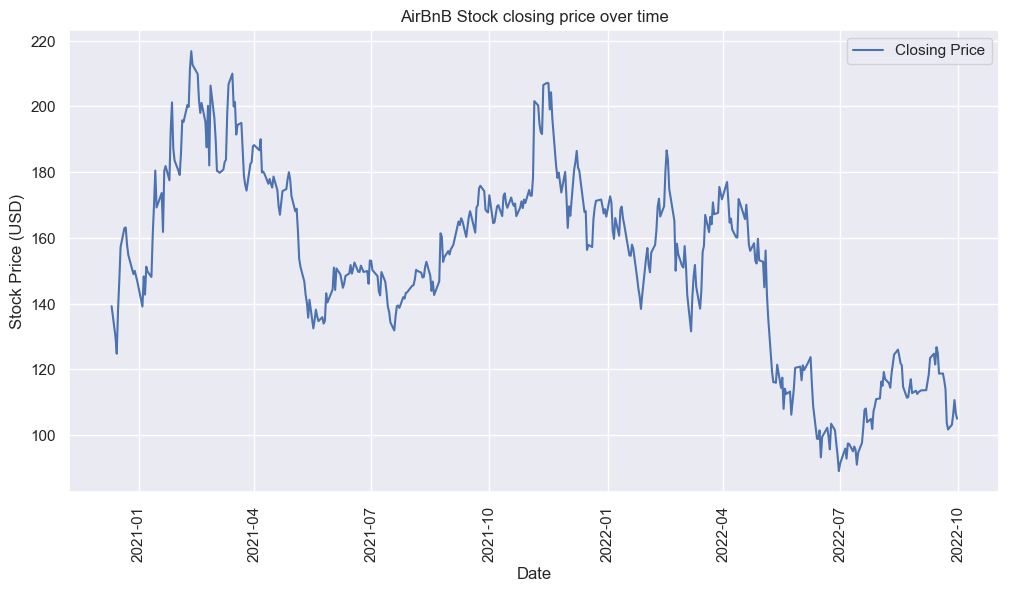

In [32]:
plt.figure(figsize =(12,6))
plt.plot(df.index,df['Close'],label = 'Closing Price',color = 'b')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('AirBnB Stock closing price over time')
plt.legend()
plt.xticks(rotation = 90)

### Feature Enginerring: Extracting Date Features

In [33]:
def create_features_datetime(df):
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['DayOfWeek'] = df.index.dayofweek
    return df
df = create_features_datetime(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,DayOfWeek
Date,,,,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,2020,12,4
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,2020,12,0
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2020,12,1
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2020,12,2
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,2020,12,3


### 3. ML model for Stock Price Prediction
- Splitting Data into Train and Test sets
  

In [34]:
X = df.drop(['Close'],axis =1)
X.head(5)


,Open,High,Low,Adj Close,Volume,Year,Month,DayOfWeek
Date,,,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,26980800,2020,12,4
2020-12-14,135.000000,135.300003,125.160004,130.000000,16966100,2020,12,0
2020-12-15,126.690002,127.599998,121.500000,124.800003,10914400,2020,12,1
2020-12-16,125.830002,142.000000,124.910004,137.990005,20409600,2020,12,2
2020-12-17,143.000000,152.449997,142.669998,147.050003,15054700,2020,12,3


In [35]:
y =df.Close
y

Date
2020-12-11    139.250000
2020-12-14    130.000000
2020-12-15    124.800003
2020-12-16    137.990005
2020-12-17    147.050003
                 ...    
2022-09-26    103.230003
2022-09-27    106.370003
2022-09-28    110.690002
2022-09-29    106.660004
2022-09-30    105.040001
Name: Close, Length: 454, dtype: float64

## train-test-split

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =0)


#### Model I: Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state =0)

In [38]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [25]:
y_pred = dtree.predict(X_test)

In [27]:
import math
from sklearn import metrics

In [49]:
mae_dt= metrics.mean_absolute_error(y_test,y_pred)
mse_dt = metrics.mean_squared_error(y_test,y_pred)
r2_dt = metrics.r2_score(y_test,y_pred)
rmse_dt = math.sqrt(mse_dt)

In [50]:
print(f"Decision_Tree = MAE: {mae_dt:.4f}, MSE: {mse_dt:.4f}, R2: {r2_dt:.4f}, RMSE: {rmse_dt:.4f}")

Decision_Tree = MAE: 0.3470, MSE: 0.2695, R2: 0.9997, RMSE: 0.5191


## 4. visualizing prediction using Decision Tree
- Adding Prediction to the Dataset

In [51]:
df['Predicted_close'] = dtree.predict(X)

#### Plot Actual vs Predicted Stock Prices

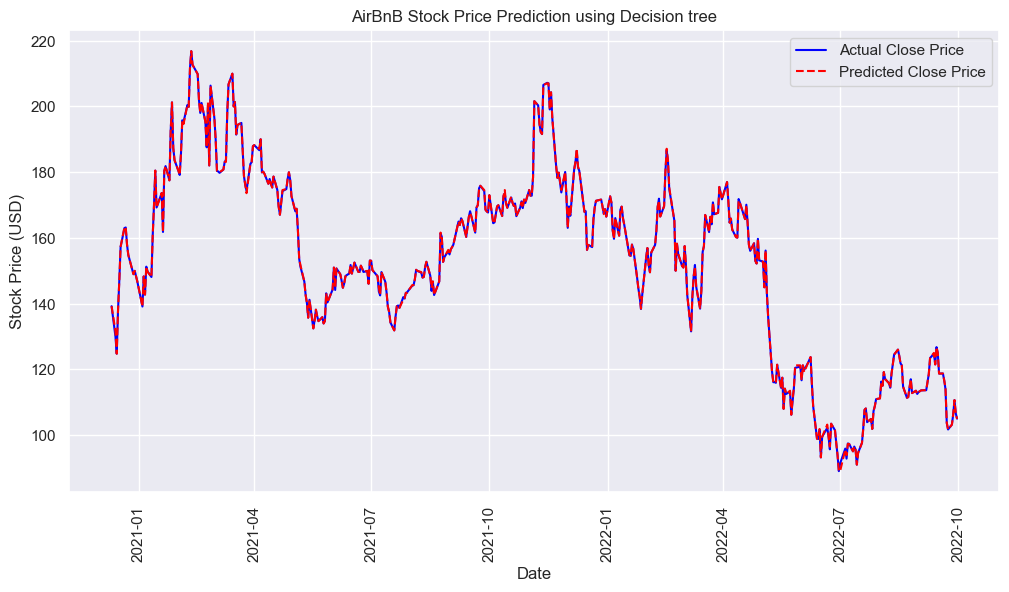

In [59]:
plt.figure(figsize = (12,6))
plt.plot(df.index,df['Close'],label ='Actual Close Price',color = 'blue')
plt.plot(df.index,df['Predicted_close'],label = 'Predicted Close Price', color ='red',linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("AirBnB Stock Price Prediction using Decision tree")
plt.xticks(rotation = 90)
plt.legend()


### 5. Conclusion
-  We successfully built a stock price prediction model using Decision Tree and Decision Tree Regressors.
-  Visualization shows that our model effectively captures the trends in Airbnb’s stock prices.es.

In [ ]:
!g